## Name- Ranjan Pratap Singh                                                      DS2307

##        .                                     .World Happiness Report Project
Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pickle

### Importing Dataset

In [3]:
df = pd.read_csv(r"C:\Users\RANJAN\OneDrive\Desktop\happiness_score_dataset.csv")

### Exploratory Data Analysis(EDA)  ----->

In [4]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Our dataset of world happiness report consit of 158 rows 12 columns . happiness score is our target variable. our dataset contain bith categorical and numerical values. happiness core is of numerical nature so we will use regression model to train , test, predict the model  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Here we observe our datatypes . 
We observe that  our features have  all datatypes -'float64', int and object(string)
#### We can see that there is no null values but to check it further  the possibility of white sapces    we will  check again

In [6]:

for i in df.columns:
    print(df[i].value_counts())


Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64
0.03780    2
0.03751    2
0.04394    2
0.05051  

#### after checking the value_counts we can be sure that there is not missing values i.e. null values.

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see  all the data have almost same so most of the data is normally distributed

if we see for outliers we can observe that there may not be any outliers but we will ankyse it later 

### Data Visualization --->

In [8]:
df1 = df.drop(['Country', 'Region','Happiness Rank','Happiness Score'], axis = 1) # all the numerical coulmns

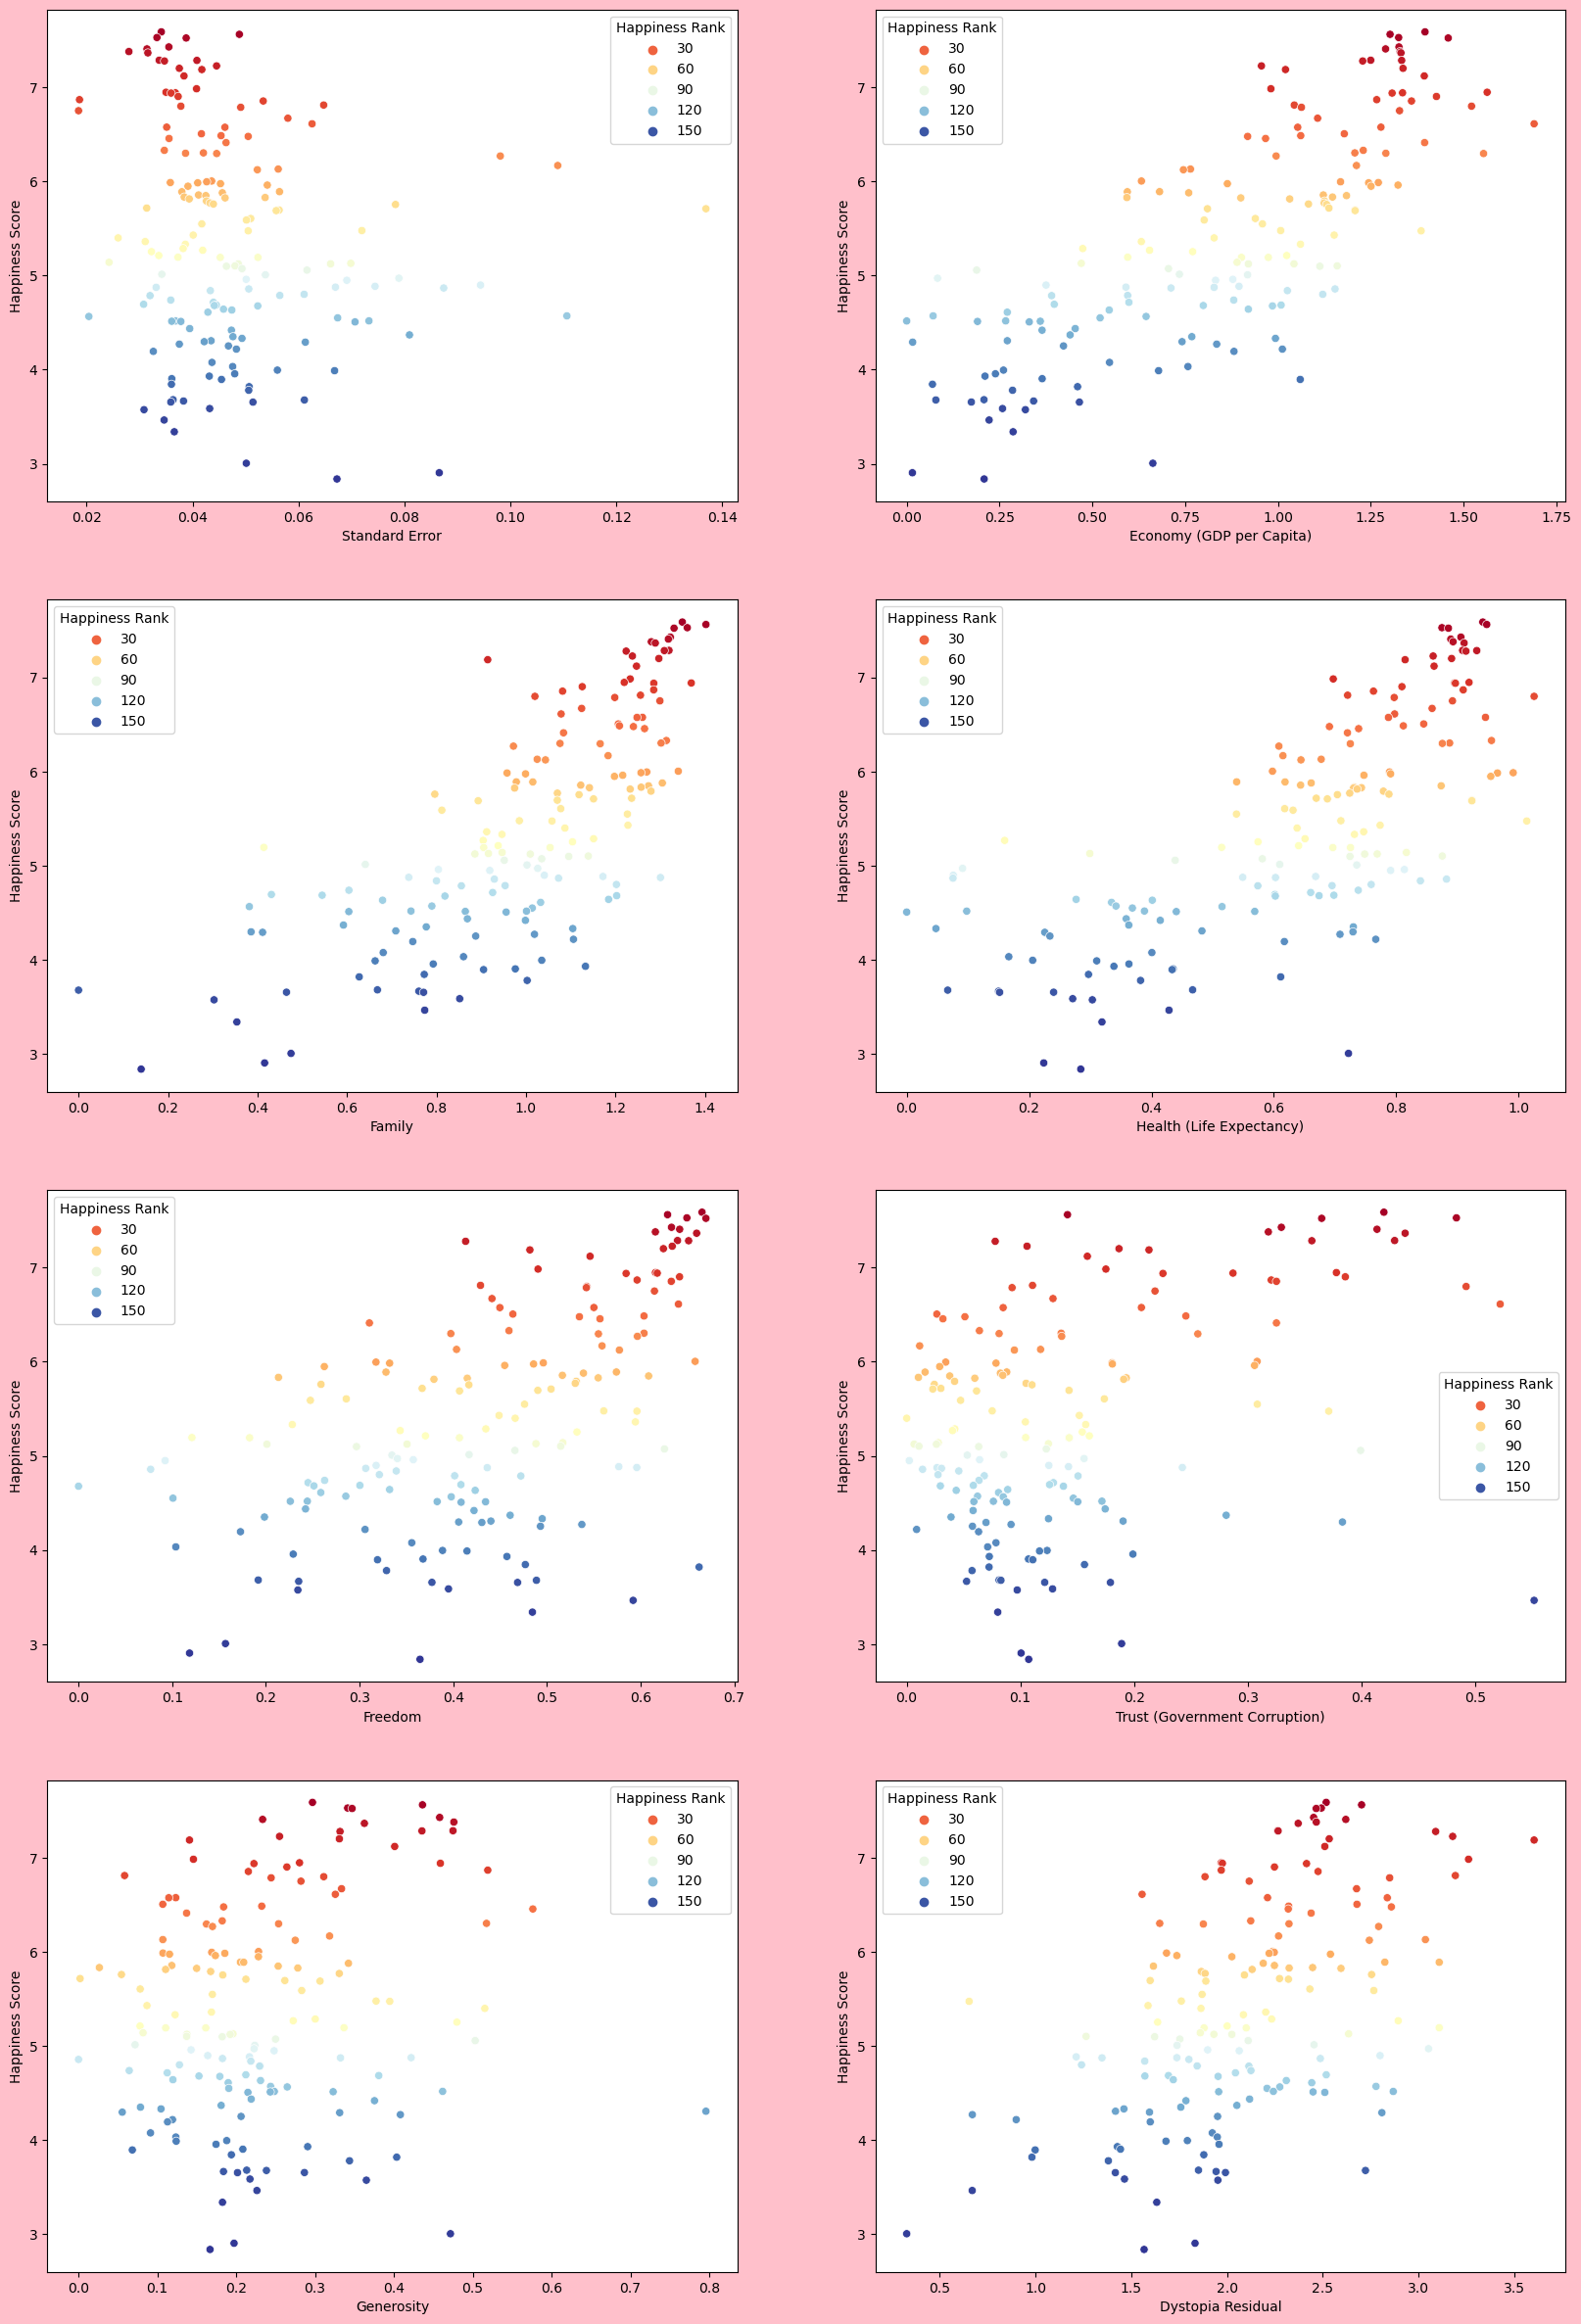

In [10]:
plt.figure(figsize=(20, 30), facecolor="pink")
plotnumber = 1

for i in df1: 
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.scatterplot(x= df1[i] ,y='Happiness Score',data = df , hue = 'Happiness Rank', palette = "RdYlBu")
        plt.xlabel(i, fontsize=10)
    plotnumber += 1

plt.show()

from fig1 - we can observe there is not significantly relation between standard error and happiness score

from fig2 - we can observe that as the economy is growing that is larger value happiness score is increasing

from fig3 - we can observe that as the family is increasing happiness score is increasing

from fig4-  we can observe that as the health  is increasing happiness score is increasing

from fig5 - we can observe that as the freedom is increasing happiness score is increasing

from fig6 -  we can observe there is not significantly relation between Trust(Government Corruption) and happiness score

from fig7 -  we can observe there is not significantly relation between Generosity and happiness score

from fig8 -  we can observe there is not significantly relation between Dystopia Residual and happiness score


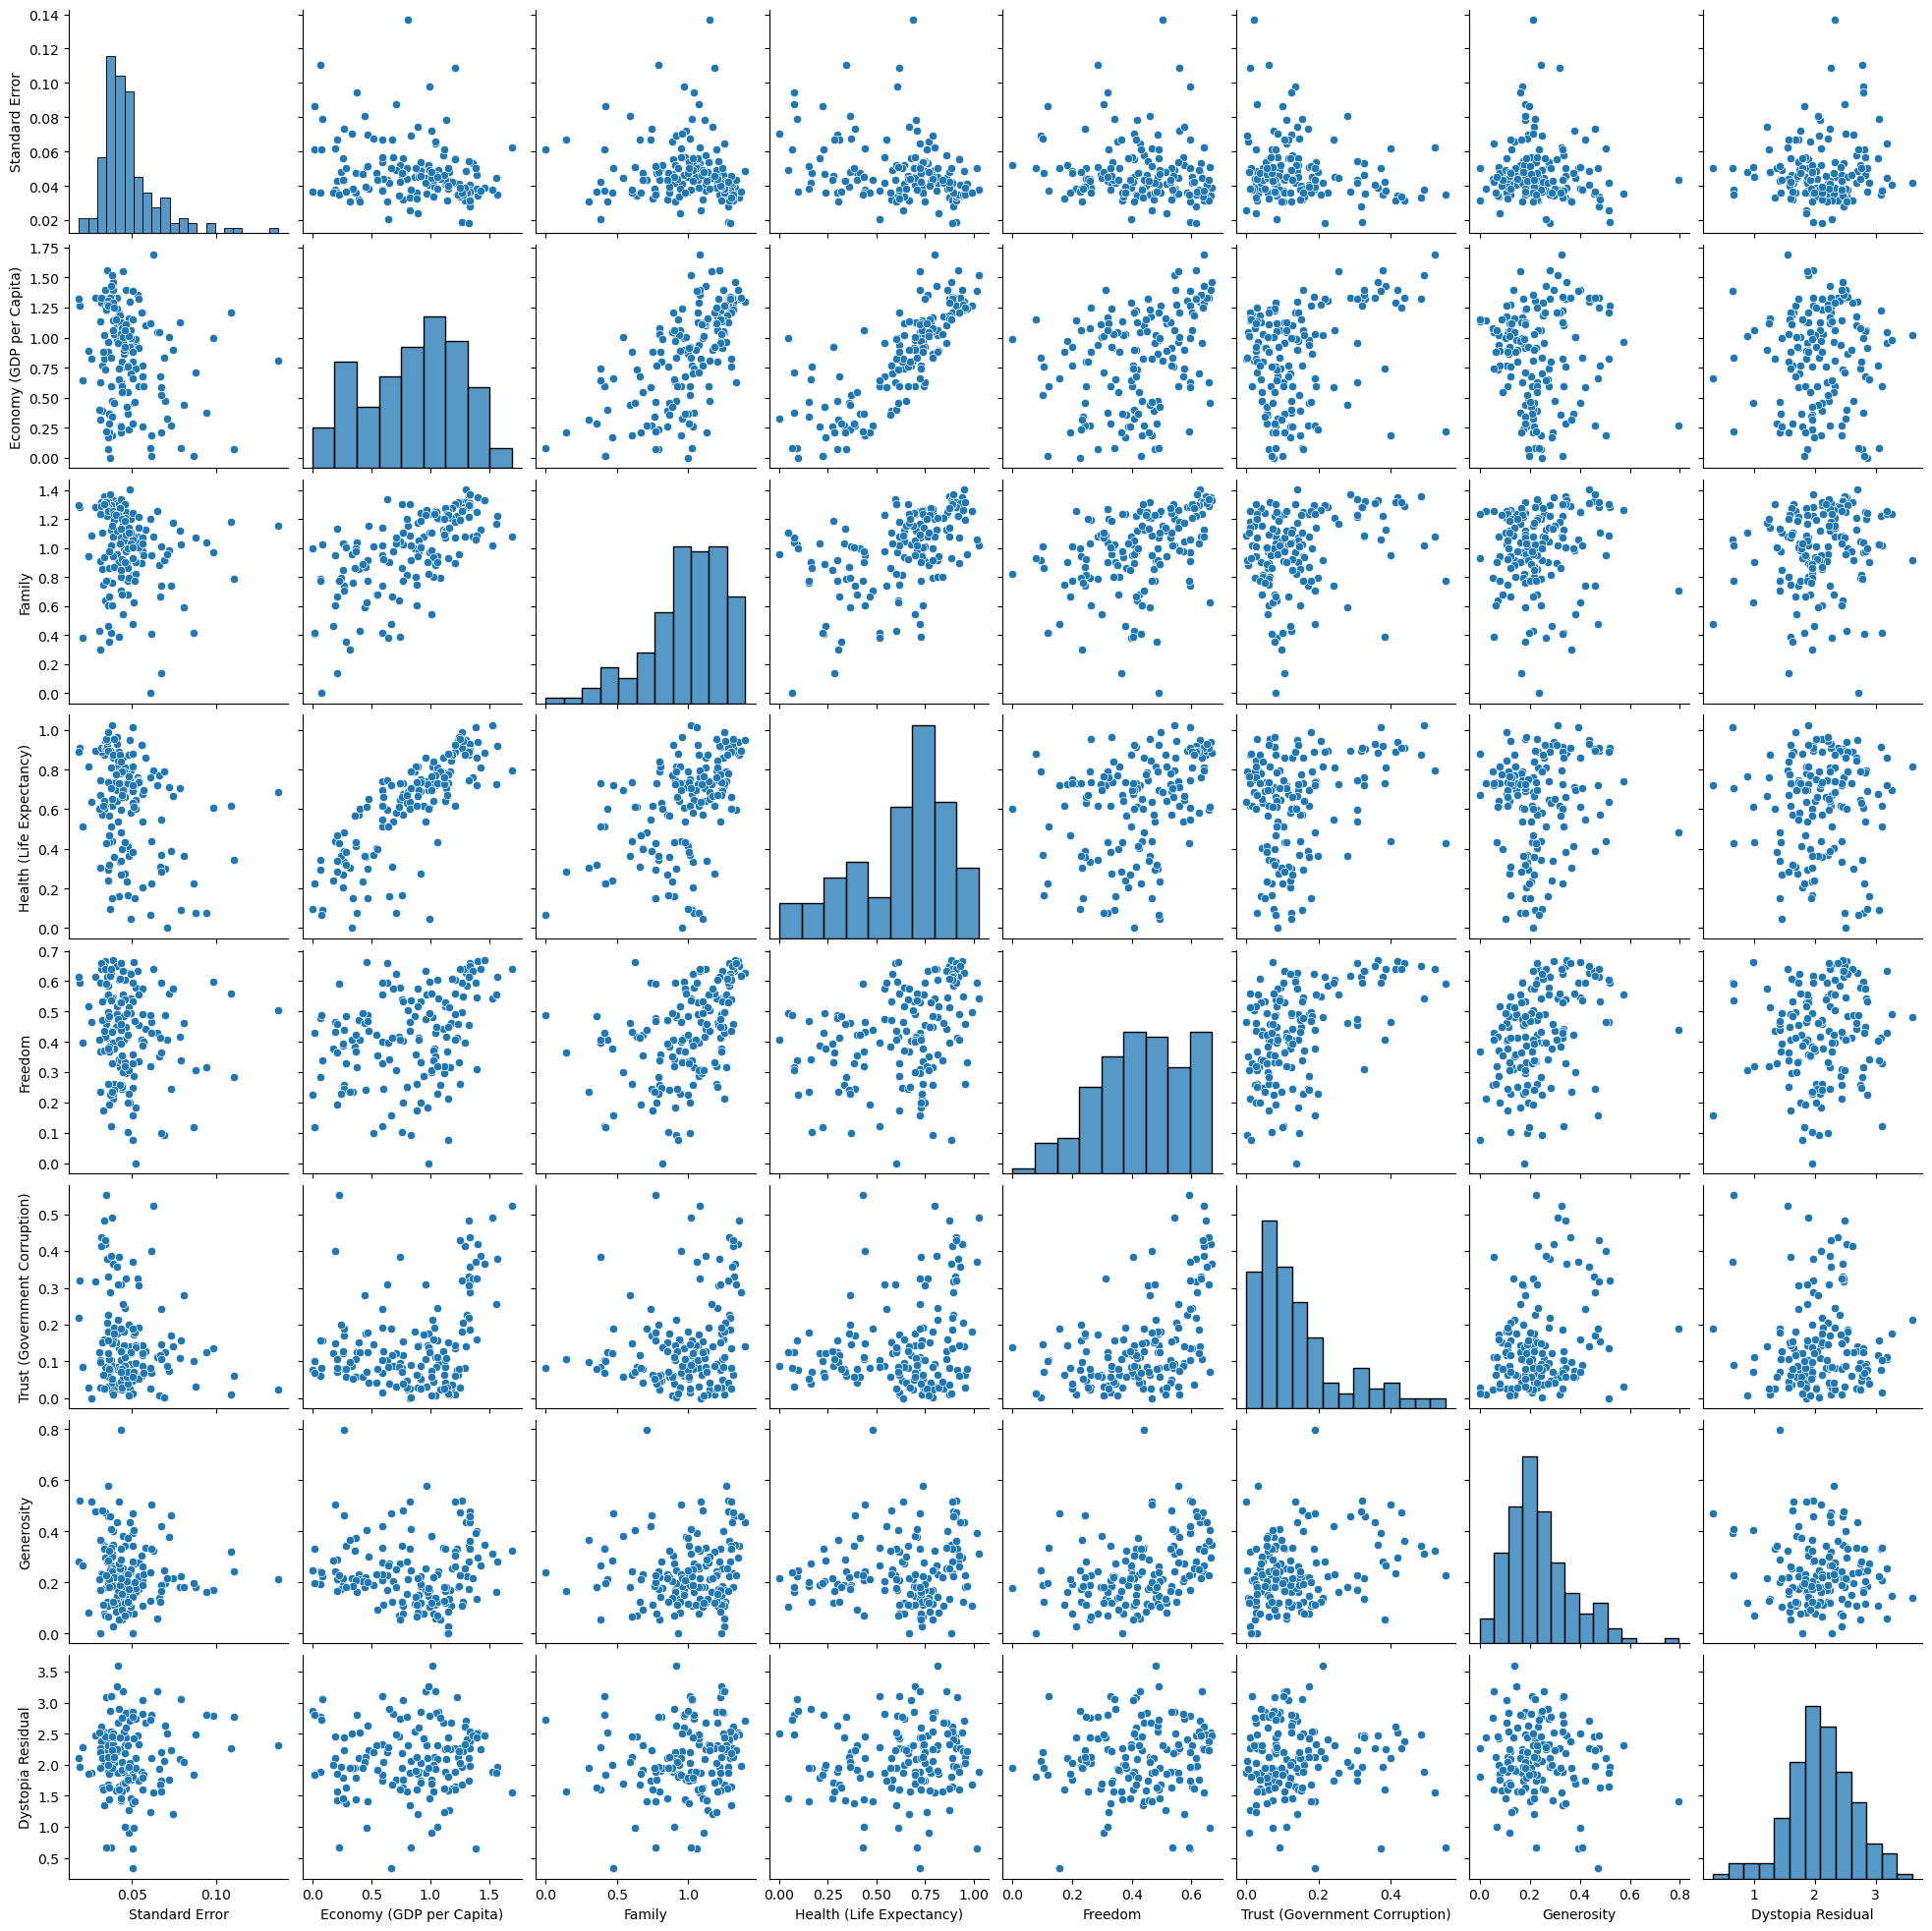

In [9]:
sns.pairplot(df1)
plt.show()

after analysis of pair plots we can say family , health , freedom have positive relationship with the economy and health , freedom has  posaitive relationship  with family

### -- Checking for Outliers

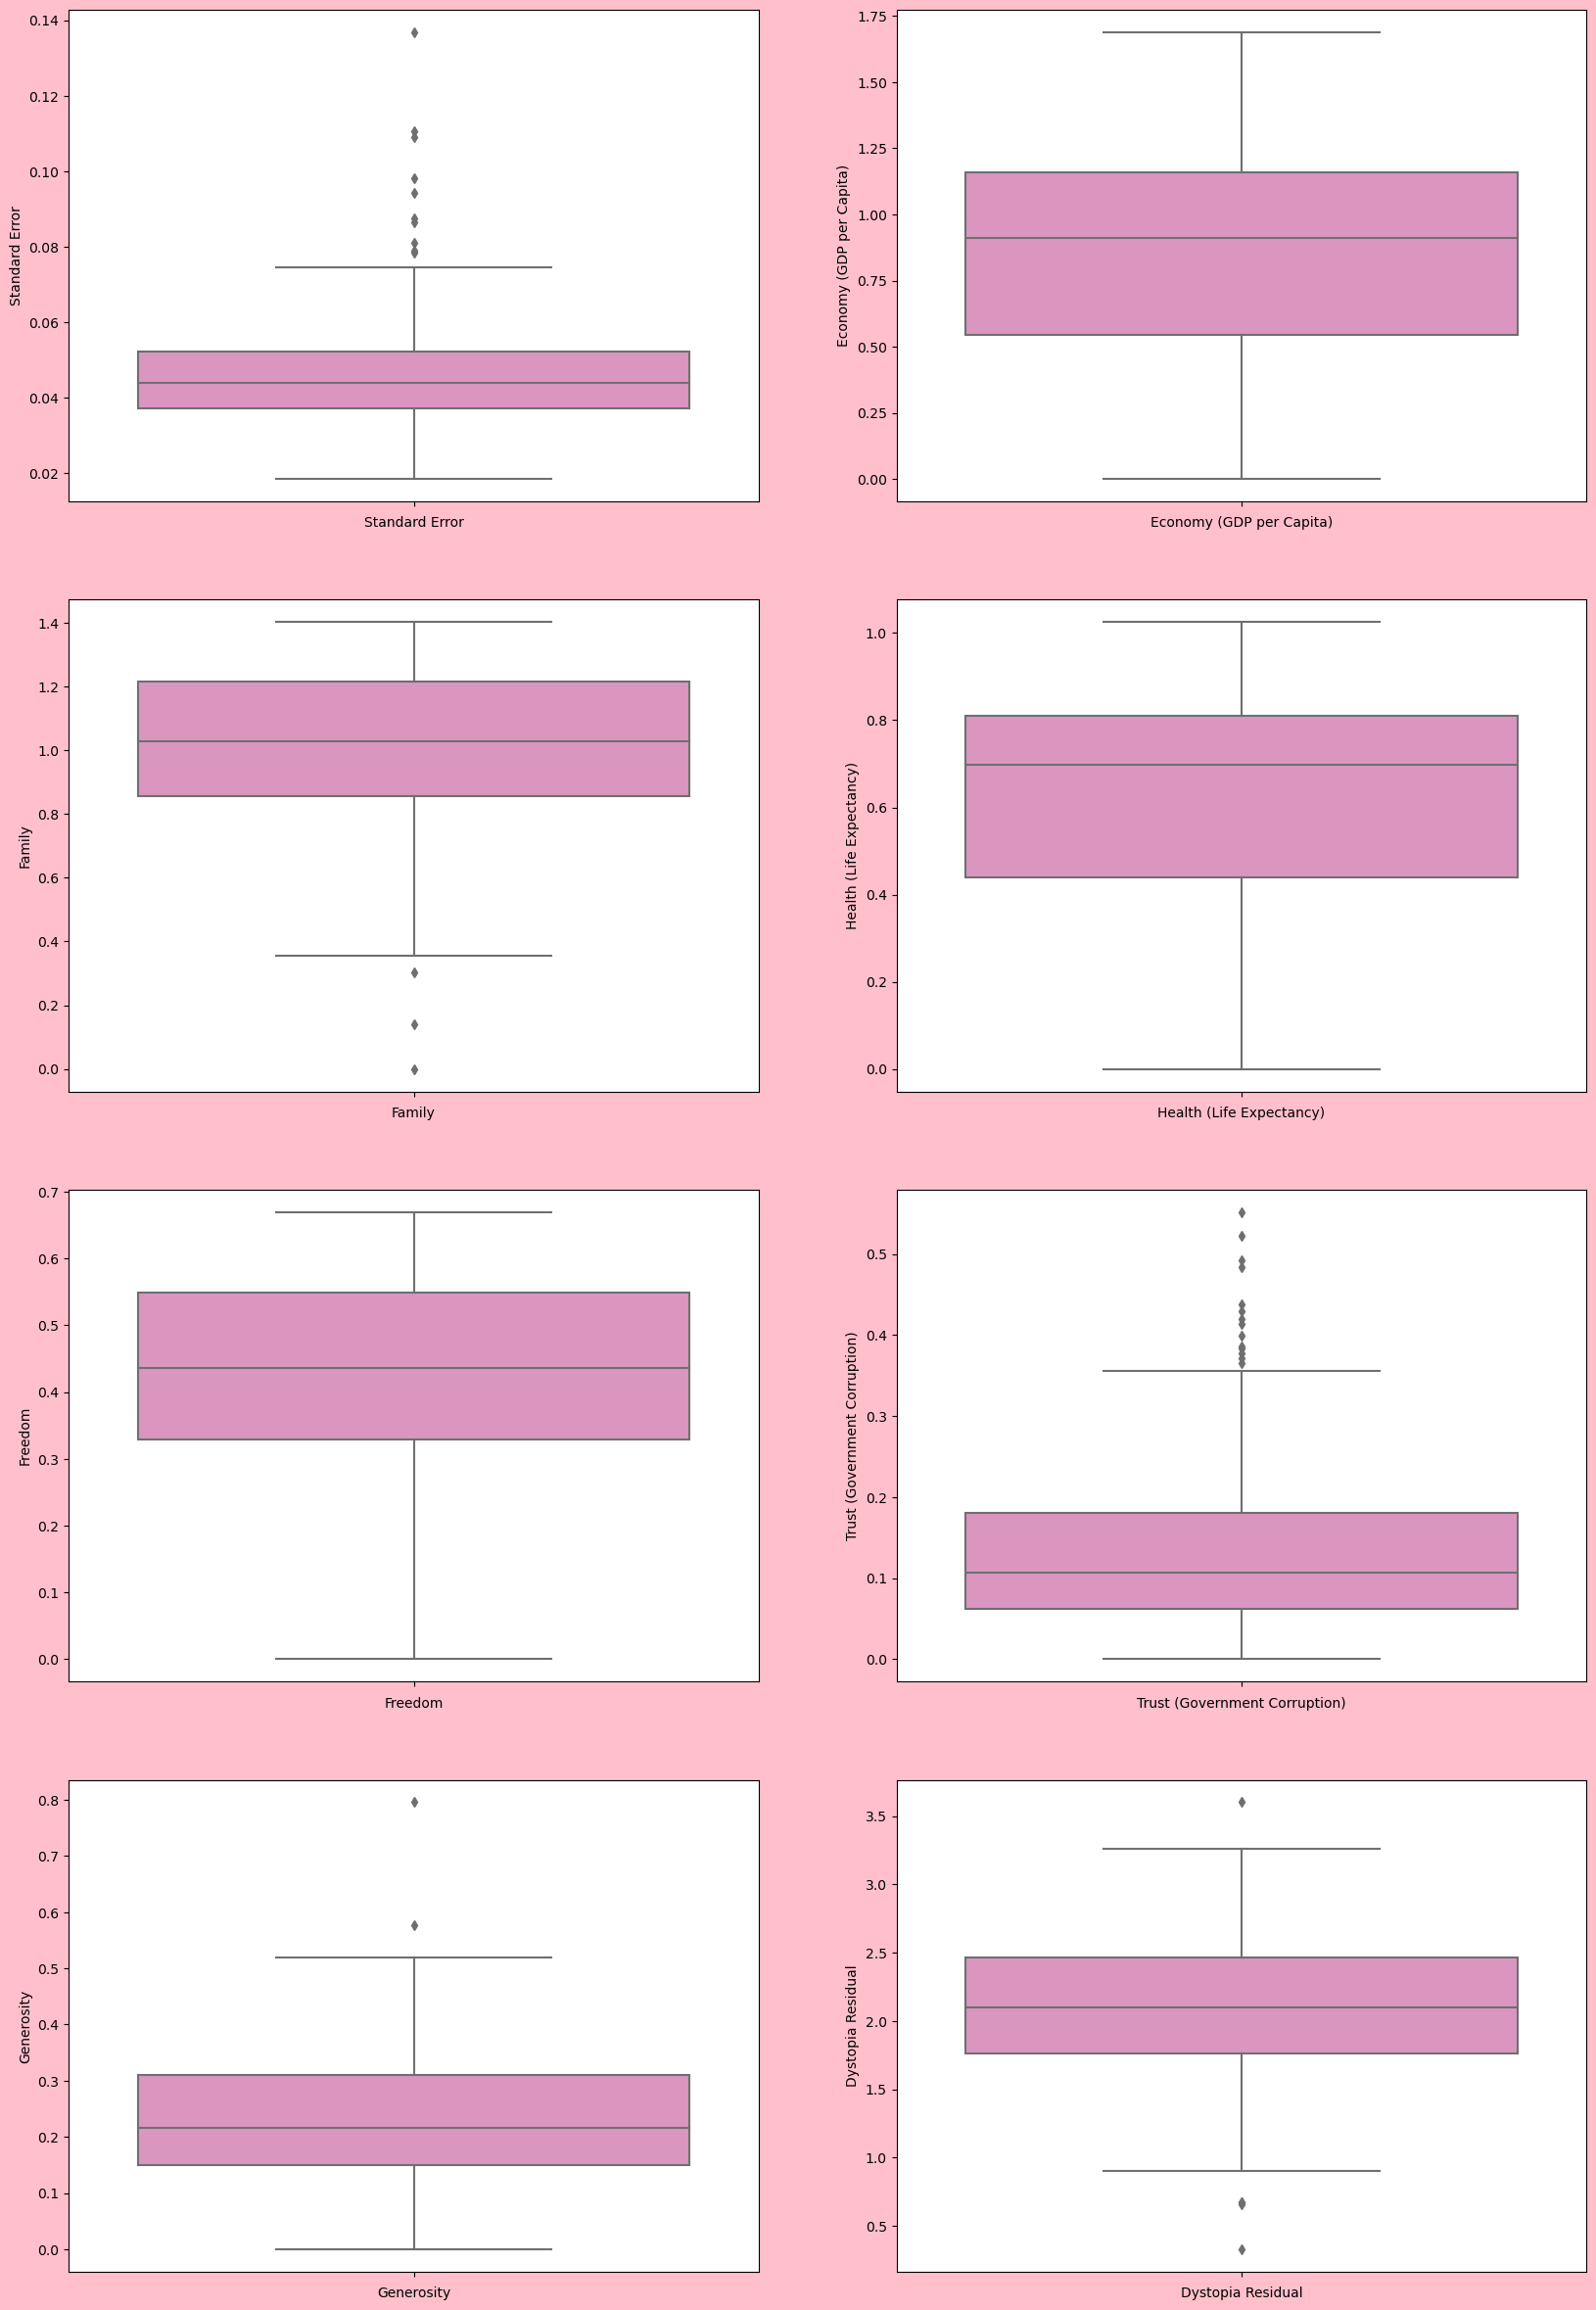

In [12]:
plt.figure(figsize=(20, 30), facecolor="pink")
plotnumber = 1


for i in df1: 
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.boxplot( y = df1[i] , palette = 'Set2_r')
        plt.xlabel(i)
    plotnumber += 1
    

plt.show()

we can see from above boxplot that Standard Error, family, Trust(Government Corruption) , Generosity, dystopia Residualhas outliers we will remove outliers to remove biasedness

by using Interquartile range

In [17]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df < (Q1-1.5*IQR)) |(df> (Q3 + 1.5*IQR))).any(axis=1)]

In [18]:
print('percentage of dataloss',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

percentage of dataloss 20.253164556962027


the data loss is IQR method is 25% that is too much so we will check another method i.e. z-score 

In [19]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [20]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 0, 0, 0, 6, 2, 5, 7, 2], dtype=int64))

In [21]:
df3= df[(z<3).all(axis=1)]

In [22]:
df3.shape

(149, 12)

In [23]:
print('percentage of dataloss',((df.shape[0]-df3.shape[0])/df.shape[0])*100)

percentage of dataloss 5.69620253164557


#### herein z-score data loss is 5.69% , as there is so much outliers in our data we accept it and further proceeds 

In [25]:
df=df3

In [26]:
df = df.reset_index(drop=True)

### -- Checking for Skewness

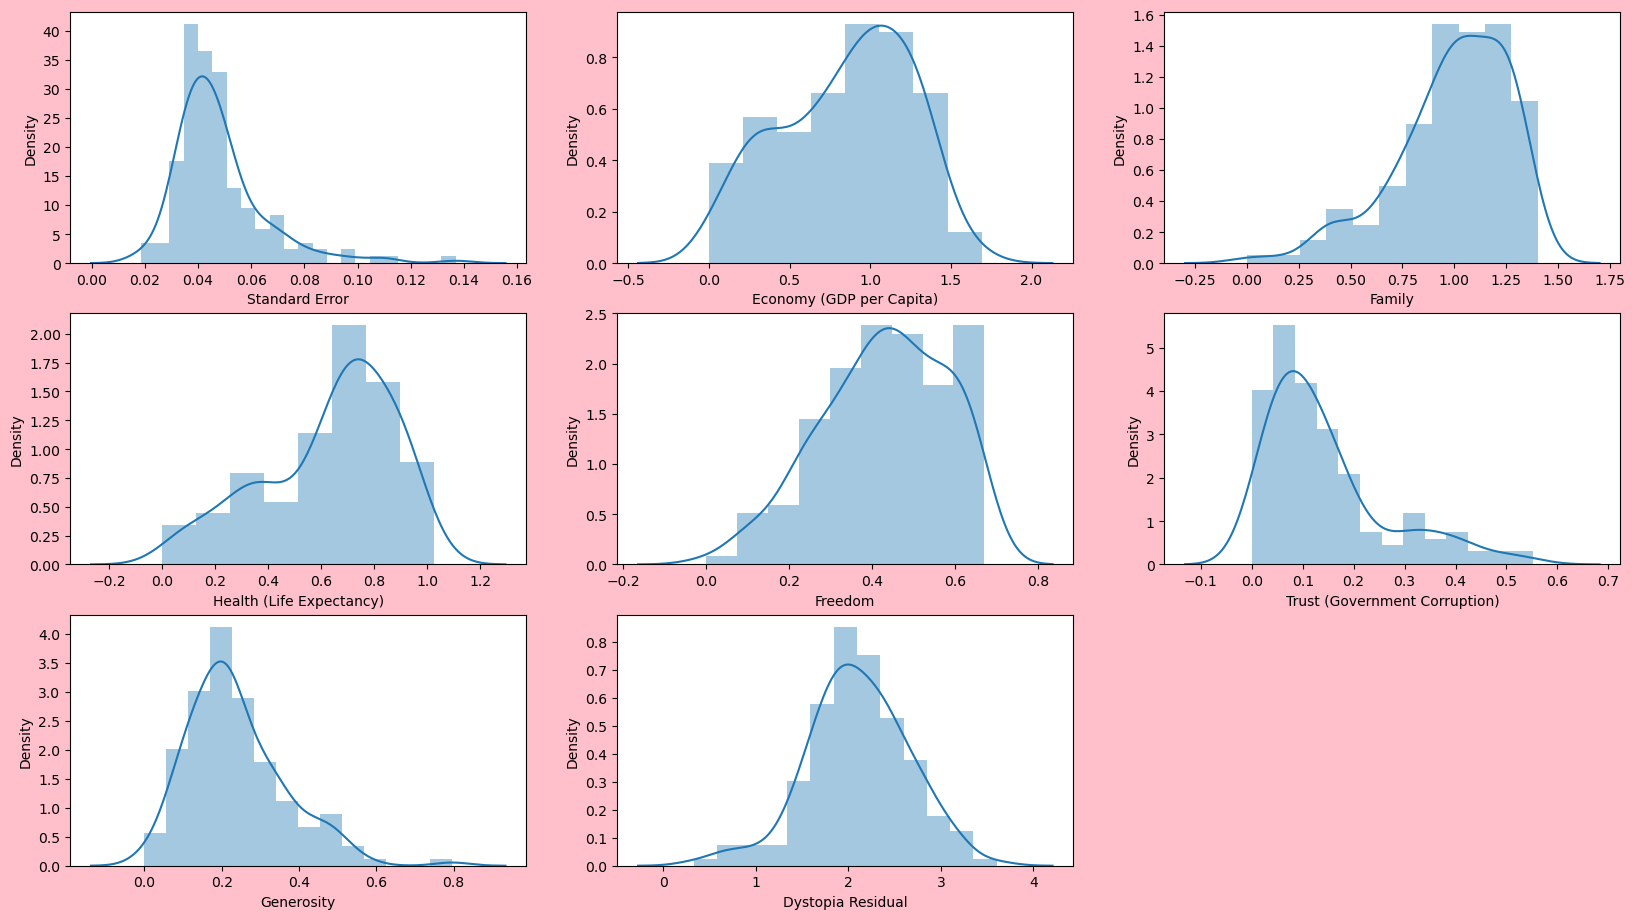

In [27]:
plt.figure(figsize=(20, 15), facecolor="pink")
plotnumber = 1

for i in df1:  # Assuming numerical_col is a list of numerical column names
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df1[i])
        plt.xlabel(i, fontsize=10)
    plotnumber += 1

plt.show()

In [28]:
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

 we can find that standard error and trust of the govt have high skewness so we will use methods to remove or moderate the skewness

In [30]:
df['Standard Error']=np.cbrt(df['Standard Error'])

In [31]:
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [32]:
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

In [33]:
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

#### now we can see there is no feature that is highly skewed but some are moderately skewed and we will go furhter with moderately skewness

### checking for correlation 

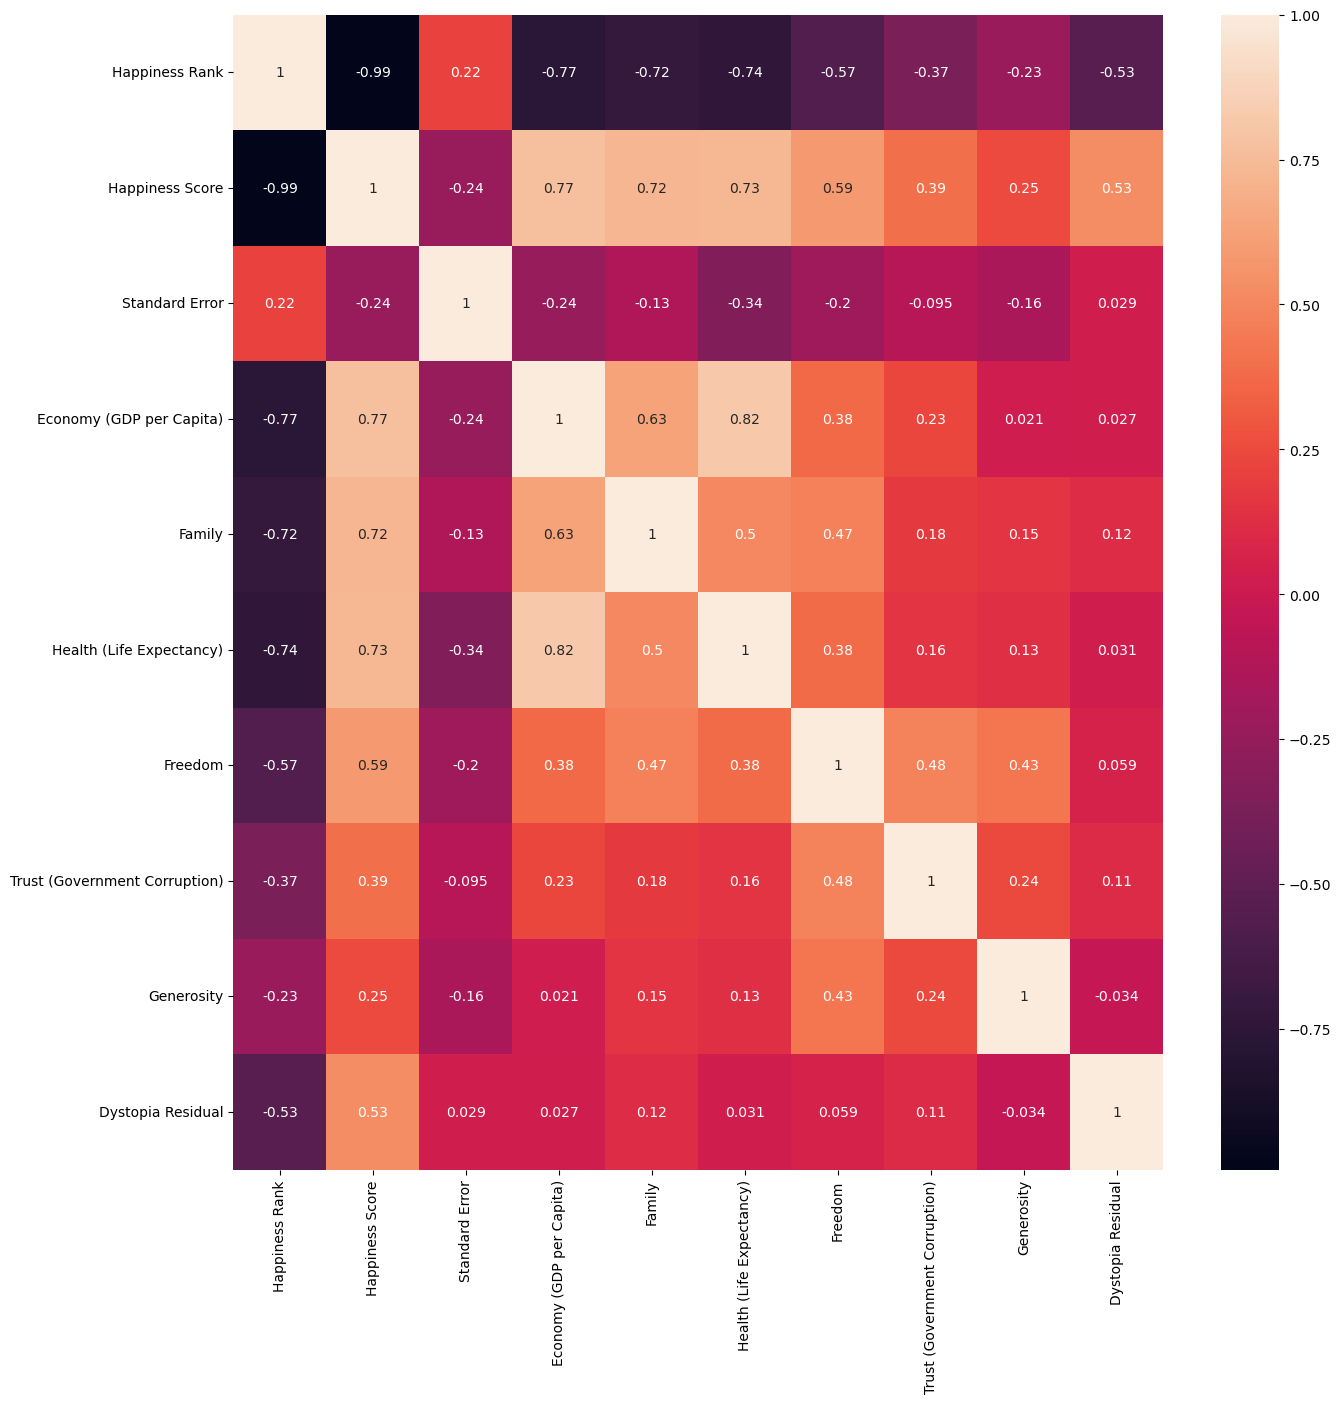

In [34]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation , annot = True)
plt.show()

here in correlation we can see that happiness rank and stanndard error has negative correaltion otherwise all features have positive correlation with the target variable
and we can see that economy and health has slightly higher correaltion with each other but we know from economics point of view that economy always affect health directly or indirectly 

### Seperating features and target variable

In [36]:
X=  df.drop(['Country', 'Region','Happiness Score'], axis = 1)
Y=df['Happiness Score'] 

### Scaling using Standard Scalar

In [37]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.713905,-0.911097,1.381916,1.357879,1.235390,1.583704,1.886835,0.546305,0.756876
1,-1.691535,0.289534,1.138324,1.567882,1.261541,1.338953,0.279412,1.713898,1.109300
2,-1.669166,-0.988343,1.198220,1.401974,0.962900,1.476027,2.142033,0.919630,0.708507
3,-1.646796,-0.496623,1.543526,1.283947,1.006023,1.611371,1.646273,0.966495,0.657485
4,-1.624427,-0.781797,1.200315,1.250726,1.089333,1.366887,1.477326,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...
144,1.641542,0.473095,-1.026255,-0.945943,-1.985941,0.274090,0.581308,-0.249803,-1.343100
145,1.663911,-0.134003,-1.562163,-0.624365,-1.498813,-0.216276,0.161899,-0.117411,-1.252030
146,1.686281,-1.223140,-1.402596,-2.811354,-1.367851,-1.285662,-0.153050,1.118051,-0.322135
147,1.731020,-0.690149,-1.488379,-2.608163,-1.303594,0.379439,-0.355660,-0.409226,-0.930702


### -- checking variance inflation factor

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif
                                                                         

,VIF values,Features
0,79.964051,Happiness Rank
1,1.186494,Standard Error
2,13.222273,Economy (GDP per Capita)
3,6.255219,Family
4,8.803673,Health (Life Expectancy)
5,3.473270,Freedom
6,1.731961,Trust (Government Corruption)
7,2.004376,Generosity
8,18.661752,Dystopia Residual


In [39]:
X = X.drop(['Happiness Rank'], axis = 1)

In [40]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif
       

,VIF values,Features
0,1.161693,Standard Error
1,4.105092,Economy (GDP per Capita)
2,1.946484,Family
3,3.417996,Health (Life Expectancy)
4,1.930776,Freedom
5,1.380158,Trust (Government Corruption)
6,1.319227,Generosity
7,1.039449,Dystopia Residual


## Creating train test Split

In [41]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (X,Y, test_size = 0.25 , random_state = i)

In [42]:
X_test.shape

(38, 8)

In [43]:
X_train.shape 

(111, 8)

#### importing necessary libraries for models

In [44]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
LR = LinearRegression()
RIG= Ridge()
SVM=SVR()
RFR=RandomForestRegressor()
DTR = DecisionTreeRegressor()
abr = AdaBoostRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## Models

#### Ridge

In [45]:
RIG.fit(X_train, Y_train)
y_pred = RIG.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9993362645988728


In [46]:
y_pred_testRIG  = RIG.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRIG ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.9972349326110631


In [47]:
mae = mean_absolute_error(Y_test, y_pred_testRIG)
mse = mean_squared_error(Y_test, y_pred_testRIG)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.03677754140719896
Mean Squared Error -->: 0.0033100406558550823
Root Mean Squared Error-->: 0.05753295278234103


#### Support vector Regression (svm)

In [49]:
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.984814441869108


In [50]:
y_pred_testSVM  = SVM.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testSVM ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.964937503513196


In [51]:
mae = mean_absolute_error(Y_test, y_pred_testSVM)
mse = mean_squared_error(Y_test, y_pred_testSVM)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.13604354242332795
Mean Squared Error -->: 0.04197304171733752
Root Mean Squared Error-->: 0.20487323328667784


#### Linear Regression

In [53]:
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9993684025223515


In [54]:
y_pred_testLR  = LR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testLR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.9973578469805038


In [55]:
mae = mean_absolute_error(Y_test, y_pred_testLR)
mse = mean_squared_error(Y_test, y_pred_testLR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.03560182904833389
Mean Squared Error -->: 0.0031629008206145105
Root Mean Squared Error-->: 0.05623967301304757


#### DecisionTreeRegressor

In [57]:
DTR.fit(X_train, Y_train)
y_pred = DTR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 1.0


In [58]:
y_pred_testDTR  = DTR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testDTR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7369193360094256


In [59]:
mae = mean_absolute_error(Y_test, y_pred_testDTR)
mse = mean_squared_error(Y_test, y_pred_testDTR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.4473421052631579
Mean Squared Error -->: 0.3149318157894735
Root Mean Squared Error-->: 0.5611878614060299


#### AdaBoost Regressor

In [61]:
abr.fit(X_train, Y_train)
y_pred = abr.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9627987257821081


In [62]:
y_pred_testABR  = abr.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testABR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8873047149482061


In [63]:
mae = mean_absolute_error(Y_test, y_pred_testABR)
mse = mean_squared_error(Y_test, y_pred_testABR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.3072964361797624
Mean Squared Error -->: 0.13490664883507114
Root Mean Squared Error-->: 0.36729640460406243


#### Random Forest Regressor

In [65]:
RFR.fit(X_train, Y_train)
y_pred = RFR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9879798018849925


In [66]:
y_pred_testRFR  = RFR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRFR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.898250565106874


In [67]:
mae = mean_absolute_error(Y_test, y_pred_testRFR)
mse = mean_squared_error(Y_test, y_pred_testRFR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.27829394736842106
Mean Squared Error -->: 0.12180345678157893
Root Mean Squared Error-->: 0.3490035197266339


we will further understand which model is best predicting by using cross validation 

## Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cscore1 = cross_val_score(abr,X,Y)
print('Cscore for AdaBoost Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for AdaBoost Regressor->  [-10.40079583  -5.83962091  -3.14028774  -5.66942233  -7.64970514]
mean of cscore->  -6.539966389673813
difference between R2 and cross validation score is 7.427271104622019


In [71]:
cscore1 = cross_val_score(LR,X,Y)
print('Cscore for Linaer Regression -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testLR)-cscore1.mean())

Cscore for Linaer Regression ->  [0.95292639 0.98078834 0.93953141 0.95752555 0.99262246]
mean of cscore->  0.9646788295066264
difference between R2 and cross validation score is 0.03267901747387736


In [72]:
cscore1 = cross_val_score(RIG,X,Y)
print('Cscore for RIDGE-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testRIG)-cscore1.mean())

Cscore for RIDGE->  [0.93343957 0.98139066 0.93868444 0.9546195  0.9907598 ]
mean of cscore->  0.9597787924977592
difference between R2 and cross validation score is 0.03745614011330389


In [73]:
cscore1 = cross_val_score(SVM,X,Y)
print('Cscore for Support Vector Model -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for Support Vector Model ->  [-10.40958689   0.12051524   0.80112338  -0.19417496  -5.60935241]
mean of cscore->  -3.0582951294865994
difference between R2 and cross validation score is 3.9455998444348053


In [74]:
cscore1 = cross_val_score(DTR,X,Y)
print('Cscore for Decision Tree Regressor -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testDTR)-cscore1.mean())

Cscore for Decision Tree Regressor ->  [ -5.97354493  -9.24120396  -5.54374431 -11.31129744  -5.50935503]
mean of cscore->  -7.515829135628742
difference between R2 and cross validation score is 8.252748471638167


In [75]:
cscore1 = cross_val_score(RFR,X,Y)
print('Cscore for RandomForest Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testRFR)-cscore1.mean())

Cscore for RandomForest Regressor->  [-8.03106336 -1.19639676 -0.70364569 -2.53124328 -6.36944168]
mean of cscore->  -3.76635815291934
difference between R2 and cross validation score is 4.664608718026214


##### after analysing cross value score we can conclude   linear Regression  score is good i.e. 96.46% with least deviation of only 3% so we chooseLinear Regression

## Hyper parameter tuning

In [76]:
LR.get_params().keys()


dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [77]:
parameters1 = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2],
    'positive': [True, False],  
}


In [78]:
GSC = GridSearchCV(LinearRegression(),parameters1,cv= 5)

In [79]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, -1, 1, 2],
                         'positive': [True, False]})

In [80]:
GSC.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

In [82]:
LR_final = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, positive= True)
LR_final.fit(X_train, Y_train)
y_pred = LR_final.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9993677853587285


In [83]:
y_pred_testLR  = LR_final.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testLR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.9973414430827777


we can see after hyperparametertuning there is very slightly increase in the accuracy

## Model Saving

In [85]:
import joblib
joblib.dump(LR_final,'model for world happiness report')

['model for world happiness report']

# Prediction 

In [86]:
mymodel = joblib.load('model for world happiness report')
prdt = mymodel.predict(X_test)
prdt

array([3.8222255 , 7.2135405 , 5.2403484 , 4.40968045, 7.4064189 ,
       5.01595063, 5.2213302 , 4.71214196, 6.80957979, 5.16570698,
       4.34120495, 4.96537152, 4.23874304, 4.91533655, 4.2348396 ,
       6.91239661, 7.25217559, 5.37462765, 5.13311478, 4.69816513,
       5.04431421, 5.88020351, 5.95530972, 5.1151136 , 4.50921715,
       7.36266842, 6.02668684, 3.57585043, 5.80267455, 4.73566078,
       6.49142697, 4.50585127, 7.00015822, 5.36594142, 4.8203909 ,
       7.4242316 , 5.82044687, 3.92686565])

In [88]:
a = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':a})
data1

,predicted,original
0,3.822226,3.819
1,7.213540,7.286
2,5.240348,5.268
3,4.409680,4.419
4,7.406419,7.427
5,5.015951,5.007
6,5.221330,5.192
7,4.712142,4.677
8,6.809580,6.786
9,5.165707,5.399


--we can see the prediction based on the model we build